# PLAN DE ANÁLISIS

*🎯 Objetivo*

Estudiar los factores que afectan el SOH (State of Health) de las baterías en buses eléctricos y proponer recomendaciones prácticas para mantenimiento o mejoras

## **🗂️ 1. Comprensión y limpieza de datos**

Se realizara la limpieza y comprension de los datos

***🔧1.1. Importar librerías***

In [1]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

import matplotlib.pyplot as plt
import seaborn as sns
import math

***📥 1.2. Cargar el archivo Excel***

In [2]:
archivo_excel = "Datos_prueba.xlsx"

In [3]:
df = pd.read_excel(archivo_excel, sheet_name="Datos")

***1.3. Analisis exploratorio inicial***

In [4]:
df.head()

,fechaHoraLecturaDato,idVehiculo,tipoBus,TipoMotor,diaSemana,Cantidad_Rutas,tipoFreno,kilometros,revolucionesMotor,velocidadVehiculo,...,minCargaBateria,maxCargaBateria,can_ev_vel,velocidadMaxima,cantidad de frenados bruscos,cantEventos_acel,aceleracionPromedio,estimacionOcupacionAbordo,Accidentes,SOH
0,2024-01-01,Z864547,T,5,Lunes,2,2,104219.0,624.59,16.24,...,78.0,100.0,199.0,66.934,19614.0,NaN,NaN,0.085000,NaN,NaN
1,2024-01-01,Z864548,T,5,Domingo,3,2,97686.0,2.00,0.04,...,67.0,100.0,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN
2,2024-01-01,Z864550,T,5,Domingo,3,2,91388.0,411.45,10.66,...,82.0,100.0,76.0,60.492,NaN,NaN,NaN,4.566038,NaN,NaN
3,2024-01-01,Z864551,T,5,Domingo,5,2,94119.0,633.03,16.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
4,2024-01-01,Z864552,T,5,Domingo,2,2,93131.0,212.73,5.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.127907,NaN,NaN


In [5]:
# Ver las dimensiones del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 172953, Columnas: 29


In [6]:
(df.isna().mean().mul(100).to_frame('Porcentaje_Nulos')
 .assign(Non_Null_Count=df.count(), Dtype=df.dtypes)
 .sort_values('Porcentaje_Nulos', ascending=False)
 .reset_index()
 .rename(columns={'index': 'Column'})
 [['Column', 'Non_Null_Count', 'Porcentaje_Nulos', 'Dtype']]
)

,Column,Non_Null_Count,Porcentaje_Nulos,Dtype
0,aceleracionPromedio,4121,97.617272,float64
1,cantEventos_acel,4121,97.617272,float64
2,cantidad de frenados bruscos,8131,95.298723,float64
3,velocidadMaxima,38347,77.828080,float64
4,can_ev_vel,38347,77.828080,float64
5,maxCargaBateria,96702,44.087700,float64
6,numComportamientosAnomalos,105885,38.778165,float64
7,minCargaBateria,107909,37.607905,float64
8,SOH,115863,33.008968,float64
9,cantAperturaCierrePuertas,154374,10.742225,float64


In [7]:
# Ver un resumen estadístico de las columnas numéricas
df.describe()

,fechaHoraLecturaDato,TipoMotor,Cantidad_Rutas,tipoFreno,kilometros,revolucionesMotor,velocidadVehiculo,estadoDesgasteFrenos,temperaturaCabina,porcentajeEnergiaGenerada,...,minCargaBateria,maxCargaBateria,can_ev_vel,velocidadMaxima,cantidad de frenados bruscos,cantEventos_acel,aceleracionPromedio,estimacionOcupacionAbordo,Accidentes,SOH
count,172953,172953.0,172953.000000,172953.000000,1.659220e+05,165922.000000,172953.000000,163305.000000,165189.000000,165922.000000,...,107909.000000,96702.000000,38347.000000,38347.000000,8131.000000,4121.000000,4121.000000,155515.000000,172673.000000,115863.000000
mean,2024-08-26 05:28:22.055471360,5.0,4.276173,1.998017,1.391349e+05,598.525264,9.512566,31.594809,33.637373,60.484845,...,40.047383,93.451583,69.648682,58.438673,45.349527,88.452803,8.613858,12.269792,1.006434,90.585661
min,2024-01-01 00:00:00,5.0,1.000000,1.000000,4.000000e+00,0.000000,0.000000,0.000000,-19.850000,0.000000,...,0.000000,0.000000,1.000000,2.246000,1.000000,1.000000,0.230000,0.000000,1.000000,0.889680
25%,2024-04-29 00:00:00,5.0,3.000000,2.000000,1.178910e+05,348.220000,8.460000,15.000000,9.690000,56.800000,...,27.000000,92.000000,3.000000,57.039000,1.000000,1.000000,7.150000,0.500000,1.000000,88.772846
50%,2024-09-01 00:00:00,5.0,4.000000,2.000000,1.372260e+05,439.290000,10.580000,27.840000,13.090000,58.900000,...,36.000000,93.000000,10.000000,58.133000,1.000000,2.000000,8.440000,9.170306,1.000000,91.192171
75%,2024-12-21 00:00:00,5.0,6.000000,2.000000,1.543378e+05,918.270000,12.190000,47.250000,14.790000,67.600000,...,49.000000,100.000000,30.000000,59.145000,2.000000,2.000000,10.020000,14.904972,1.000000,93.758555
max,2025-04-10 00:00:00,5.0,22.000000,2.000000,3.374771e+07,5327.000000,228.700000,100.000000,886.780000,76.070000,...,100.000000,100.000000,37481.000000,81.488000,25704.000000,44599.000000,14.500000,1098.506494,2.000000,99.994445
std,NaN,0.0,2.178305,0.044489,2.951477e+05,468.071564,4.419414,22.197878,126.271939,8.911616,...,18.474391,10.912371,820.443438,3.382052,838.362393,899.856081,2.057640,17.812782,0.079955,6.074143


### 🔍 Conclusiónes del Análisis Exploratorio Inicial

El dataset contiene 172.953 registros y 29 variables relacionadas con el funcionamiento de una flota de buses eléctricos. Se observan las siguientes características clave:

-las variables están bien clasificadas como numéricas o categóricas según su naturaleza

 ⚠️ **Valores faltantes relevantes**:
  - La variable objetivo `SOH` tiene un 33% de datos faltantes.
  
  - las 10 primeras columnas mostradas excepcto `SOH` son Variables de eventos puntuales como `cantidad de frenados bruscos`, `cantEventos_acel`,`aceleracionPromedio`,`velocidadMaxima` etc tienen gran cantidad de nulos, lo cual es esperable dada que no son mediciones continuas.

  - Variables operativas clave como `kilometros`, `temperaturaBaterias` y `estadoDesgasteFrenos` presentan entre 4% y 6% de nulos.
    
- 📉 **Distribuciones con outliers**:
  - Existen valores extremos en `temperaturaCabina` (hasta 886 °C), `cantidad de frenados bruscos` (>25 mil) y `kilometros` (>33 millones), que probablemente son errores de captura y deben ser tratados como *outliers*.
  
- ⚙️ **Variables constantes**:
  - Algunas columnas como `TipoMotor` presentan un único valor (`5`) en todos los registros, por lo que podrían descartarse del análisis por falta de variabilidad.

### ✅ Proxiomas acciones dado lo anterior
1. Imputar con cero las variables de eventos puntuales (`NaN = evento no ocurrido`).
2. Imputar o eliminar registros con nulos en mediciones clave si representan pocos casos.
3. Tratar outliers antes de realizar modelado o visualizaciones.
4. Filtrar registros con `SOH` no nulo para modelos explicativos/predictivos.

 ## 1.4🧹 Limpieza del dataset

Dado el análisis exploratorio inicial que reveló algunas problemáticas de calidad en los datos, se procede a ejecutar un protocolo estructurado de limpieza del dataset. Este proceso constará de tres fases estratégicas:
 - Imputación de valores nulos.
 - Tratamiento de outliers.
 - Eliminación de registros duplicados.
 - Conversión de tipos de datos.
 - Análisis de patrones de nulos

### 1.4.1 🔧Imputación de valores nulos

- #### Imputaciòn en eventos puntuales

A los eventos puntuales como por ejemplo, cantidad de frenados bruscos, cantEventos_acel se les imputara con  0 en los valores NaN, ya que la ausencia de valor significa que el evento no ocurrió ese día. Esto mejora la calidad del dataset sin distorsionar la información.

In [8]:
# Lista de columnas de eventos puntuales donde los NaN indican que el evento no ocurrió
eventos_puntuales = [
    "cantAperturaCierrePuertas",
    "numComportamientosAnomalos",
    "minCargaBateria",
    "maxCargaBateria",
    "can_ev_vel",
    "velocidadMaxima",
    "cantidad de frenados bruscos",
    "cantEventos_acel",
    "aceleracionPromedio",
    "estimacionOcupacionAbordo",
    "Accidentes"
]

# Imputar con 0 los valores nulos en estas columnas
for col in eventos_puntuales:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("✅ Valores nulos en eventos puntuales imputados correctamente con 0.")


✅ Valores nulos en eventos puntuales imputados correctamente con 0.


In [9]:
(df.isna().mean().mul(100).to_frame('Porcentaje_Nulos')
 .assign(Non_Null_Count=df.count(), Dtype=df.dtypes)
 .sort_values('Porcentaje_Nulos', ascending=False)
 .reset_index()
 .rename(columns={'index': 'Column'})
 [['Column', 'Non_Null_Count', 'Porcentaje_Nulos', 'Dtype']]
)

,Column,Non_Null_Count,Porcentaje_Nulos,Dtype
0,SOH,115863,33.008968,float64
1,estadoDesgasteFrenos,163305,5.578394,float64
2,temperaturaCabina,165189,4.489081,float64
3,revolucionesMotor,165922,4.065266,float64
4,consumoEnergia,165922,4.065266,float64
5,temperaturaBaterias,165922,4.065266,float64
6,porcentajeEnergiaGenerada,165922,4.065266,float64
7,nivelRestanteEnergia,165922,4.065266,float64
8,kilometros,165922,4.065266,float64
9,minCargaBateria,172953,0.000000,float64


Tras la limpieza, los valores nulos se redujeron significativamente. Ahora la variable con mayor porcentaje es `SOH` (33.01%), nuestra variable objetivo, que recibirá tratamiento especial. Entre las predictoras, `estadoDesgasteFrenos` tiene el mayor residual (5.58%), el cual analizaremos posteriormente.

- #### Imputación en mediciones claves

Las columnas con valores nulos superiores al 0% (excluyendo la variable objetivo SOH) se imputarán usando la media. Conservamos estos registros porque, aunque presentan tasas de faltantes entre 4% y 5%, contienen información valiosa para el análisis.

In [10]:
# Lista de variables continuas clave
variables_continuas = [
    "kilometros",
    "revolucionesMotor",
    "estadoDesgasteFrenos",
    "temperaturaCabina",
    "porcentajeEnergiaGenerada",
    "temperaturaBaterias",
    "nivelRestanteEnergia",
    "consumoEnergia"
]

# Imputación con la media
for col in variables_continuas:
    if col in df.columns:
        media = df[col].mean()
        df[col] = df[col].fillna(media)

print("✅ Valores nulos en variables continuas imputados con la media.")


✅ Valores nulos en variables continuas imputados con la media.


In [11]:
(df.isna().mean().mul(100).to_frame('Porcentaje_Nulos')
 .assign(Non_Null_Count=df.count(), Dtype=df.dtypes)
 .sort_values('Porcentaje_Nulos', ascending=False)
 .reset_index()
 .rename(columns={'index': 'Column'})
 [['Column', 'Non_Null_Count', 'Porcentaje_Nulos', 'Dtype']]
)

,Column,Non_Null_Count,Porcentaje_Nulos,Dtype
0,SOH,115863,33.008968,float64
1,consumoEnergia,172953,0.000000,float64
2,Accidentes,172953,0.000000,float64
3,estimacionOcupacionAbordo,172953,0.000000,float64
4,aceleracionPromedio,172953,0.000000,float64
5,cantEventos_acel,172953,0.000000,float64
6,cantidad de frenados bruscos,172953,0.000000,float64
7,velocidadMaxima,172953,0.000000,float64
8,can_ev_vel,172953,0.000000,float64
9,maxCargaBateria,172953,0.000000,float64


Como se evidencia en la tabla, el dataset ahora presenta ausencia completa de valores nulos en todas las variables predictoras, manteniéndose únicamente en la variable objetivo (SOH).

### 1.4.2 🚨 Tratamiento de outliers

A continuación, se ejecutará la detección y tratamiento de outliers en variables continuas, identificando valores extremos que excedan los umbrales estadísticos establecidos. Estos casos, considerados potenciales errores de captura, serán eliminados o acotados mediante técnicas robustas de winsorización para preservar la integridad del análisis.

In [12]:
def winsorizar_columnas(df, columnas, p_inferior=0.01, p_superior=0.99):
    """
    Aplica winsorización (limitación de outliers) a las columnas numéricas especificadas.
    
    Parámetros:
    - df: DataFrame
    - columnas: lista de columnas a winsorizar
    - p_inferior: percentil inferior (default 1%)
    - p_superior: percentil superior (default 99%)

    Retorna:
    - Una copia del DataFrame con las columnas winsorizadas
    """
    df_wins = df.copy()
    for col in columnas:
        if col in df.columns:
            low = df[col].quantile(p_inferior)
            high = df[col].quantile(p_superior)
            df_wins[col] = df[col].clip(lower=low, upper=high)
            print(f"✔ '{col}' winsorizado entre {low:.2f} y {high:.2f}")
    return df_wins


In [13]:
def comparar_boxplots(df_original, df_wins, columnas, columnas_por_fila=2, altura_fila=4):
    """
    Compara boxplots antes y después de la winsorización para las variables indicadas.

    Parámetros:
    - df_original: DataFrame original
    - df_wins: DataFrame con winsorización aplicada
    - columnas: lista de variables a graficar
    - columnas_por_fila: cantidad de gráficos por fila
    - altura_fila: altura de cada fila en pulgadas
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math

    total = len(columnas)
    filas = math.ceil(total / columnas_por_fila)

    fig, axes = plt.subplots(filas, columnas_por_fila * 2, figsize=(columnas_por_fila * 10, filas * altura_fila))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        # Boxplot original
        sns.boxplot(data=df_original, x=col, ax=axes[i * 2], color='salmon')
        axes[i * 2].set_title(f"{col} (Original)")
        axes[i * 2].set_xlabel("")

        # Boxplot winsorizado
        sns.boxplot(data=df_wins, x=col, ax=axes[i * 2 + 1], color='lightgreen')
        axes[i * 2 + 1].set_title(f"{col} (Winsorizado)")
        axes[i * 2 + 1].set_xlabel("")

    # Ocultar los ejes no usados si hay un número impar de columnas
    for j in range(2 * total, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()


✔ 'kilometros' winsorizado entre 91905.00 y 179798.88
✔ 'cantidad de frenados bruscos' winsorizado entre 0.00 y 2.00
✔ 'temperaturaCabina' winsorizado entre 0.00 y 779.34
✔ 'velocidadVehiculo' winsorizado entre 0.00 y 16.67
✔ 'revolucionesMotor' winsorizado entre 0.00 y 1724.47
✔ 'aceleracionPromedio' winsorizado entre 0.00 y 8.89
✔ 'SOH' winsorizado entre 69.32 y 99.39


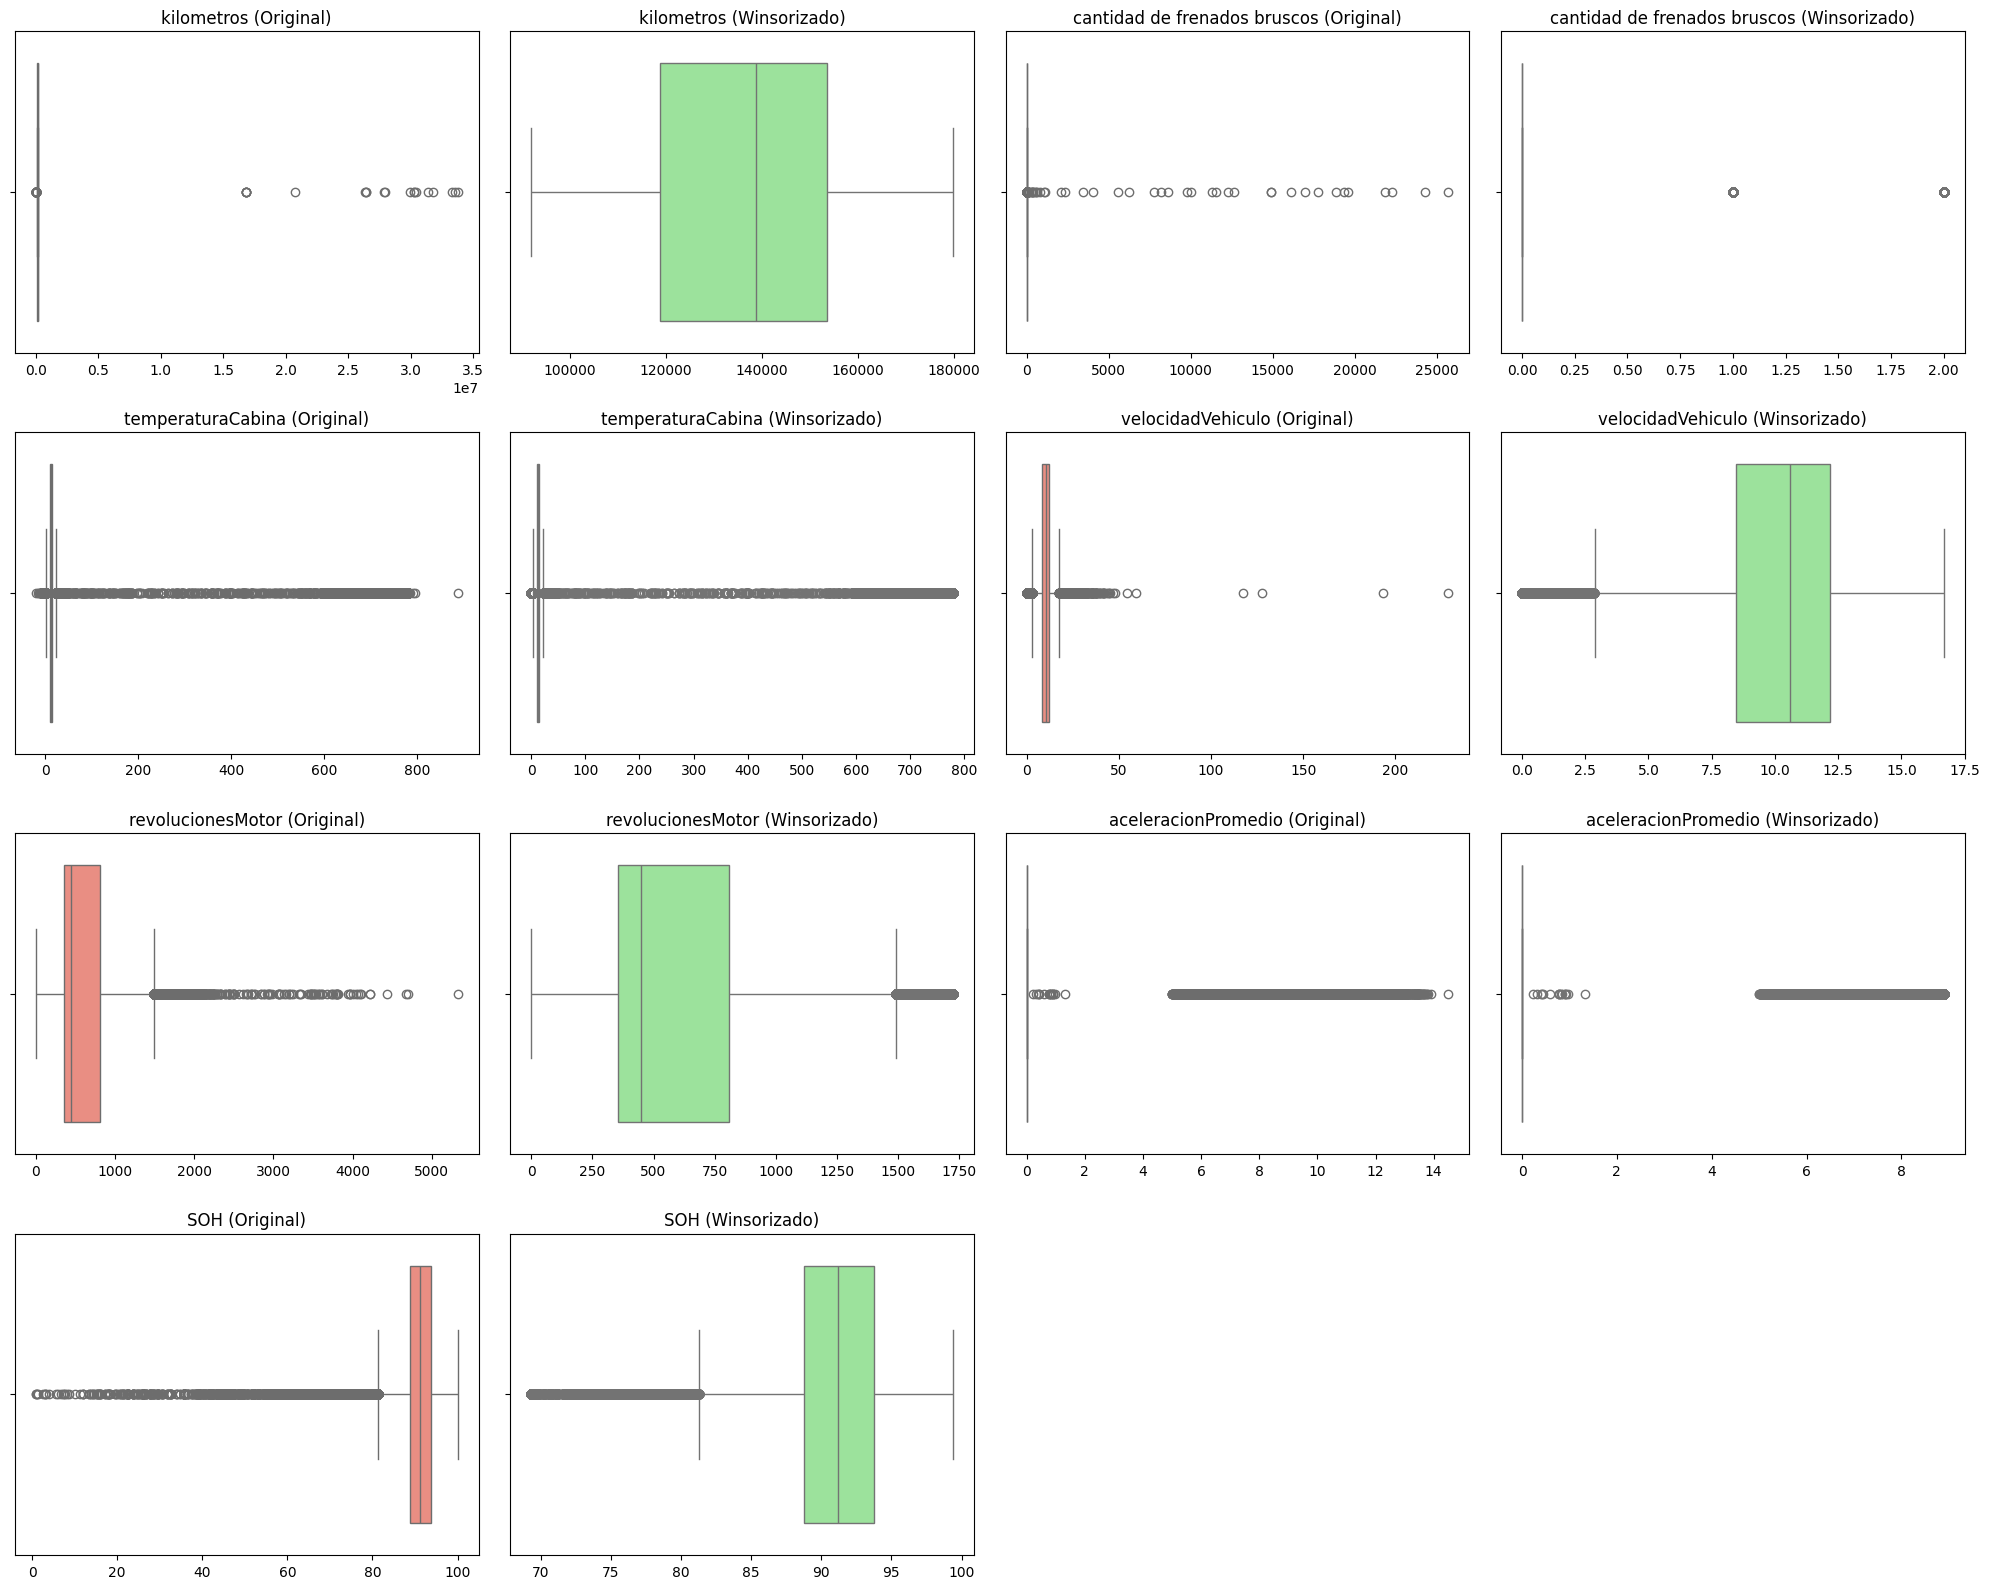

In [14]:
variables_outliers = [
    "kilometros",
    "cantidad de frenados bruscos",
    "temperaturaCabina",
    "velocidadVehiculo",
    "revolucionesMotor",
    "aceleracionPromedio",
    "SOH"
]

# Crear versión winsorizada del DataFrame
df_wins = winsorizar_columnas(df, variables_outliers)

# Comparar boxplots antes y después
comparar_boxplots(df, df_wins, variables_outliers)


### 🧾 Conclusión sobre el tratamiento de outliers (winsorización)

Se aplicó **winsorización** a las variables con posibles valores atípicos, limitando sus valores al rango entre los percentiles 1% y 99%. Esta técnica permite **reducir la influencia de valores extremos sin eliminar registros**, lo cual es útil para conservar la estructura completa del dataset.

Las variables tratadas mostraron mejoras en su distribución, con rangos más coherentes y sin distorsiones visibles aunque algunas no muestran distribuciones normales pero estan dentro de rangos aceptables. Sin embargo, se detectó que la variable **`temperaturaCabina`** conserva valores anómalos incluso después del recorte (valores por encima de 700 °C), lo cual **no es físicamente posible**. Por tanto, esta variable será **analizada con mayor profundidad** para evaluarla y decidir cómo proceder.

El resto de variables winsorizadas muestran rangos más consistentes con la operación normal de los buses, lo cual permitirá análisis y modelado más robustos en los siguientes pasos.

### 🧾 Analisis de variable temperaturaCabina

In [15]:
df["temperaturaCabina"].describe()

count    172953.000000
mean         33.637373
std         123.405155
min         -19.850000
25%          10.110000
50%          13.250000
75%          15.060000
max         886.780000
Name: temperaturaCabina, dtype: float64

Se detectaron valores de temperatura extremadamente altos (886°C) que resultan físicamente incoherentes para el contexto operativo. Para abordar esta anomalía, se realizará un análisis distributivo exhaustivo de los datos con el fin de identificar y gestionar adecuadamente estos errores de medición mediante la aplicación de umbrales técnicos basados en conocimiento de dominio.

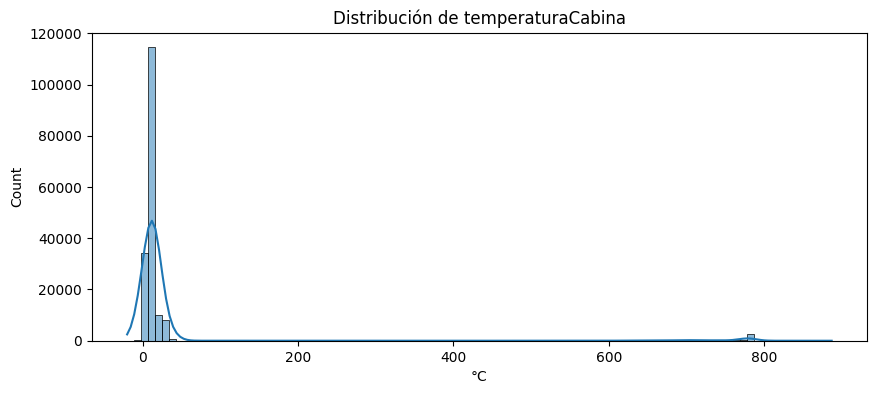

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(df["temperaturaCabina"], bins=100, kde=True)
plt.title("Distribución de temperaturaCabina")
plt.xlabel("°C")
plt.show()

El análisis distributivo confirma que los datos de temperatura siguen un patrón normal, concentrándose en valores consistentemente inferiores a 100°C, lo que corresponde al rango operativo esperado para el sistema bajo estudio.

In [17]:
# Temperaturas mayores a 100 °C (límite físicamente posible en una cabina)
df_altas = df[df["temperaturaCabina"] > 100]

print(f"Registros con temperatura > 100 °C: {df_altas.shape[0]}")
df_altas[["fechaHoraLecturaDato", "idVehiculo", "temperaturaCabina"]].head()


Registros con temperatura > 100 °C: 5271


,fechaHoraLecturaDato,idVehiculo,temperaturaCabina
2,2024-01-01,Z864550,779.34
20,2024-01-01,Z864586,779.34
42,2024-01-01,Z864625,779.34
53,2024-01-01,Z864640,779.34
68,2024-01-01,Z864668,227.04


hay 5721 registros anomalos se procedera a evaluar solo lo que supera el limite

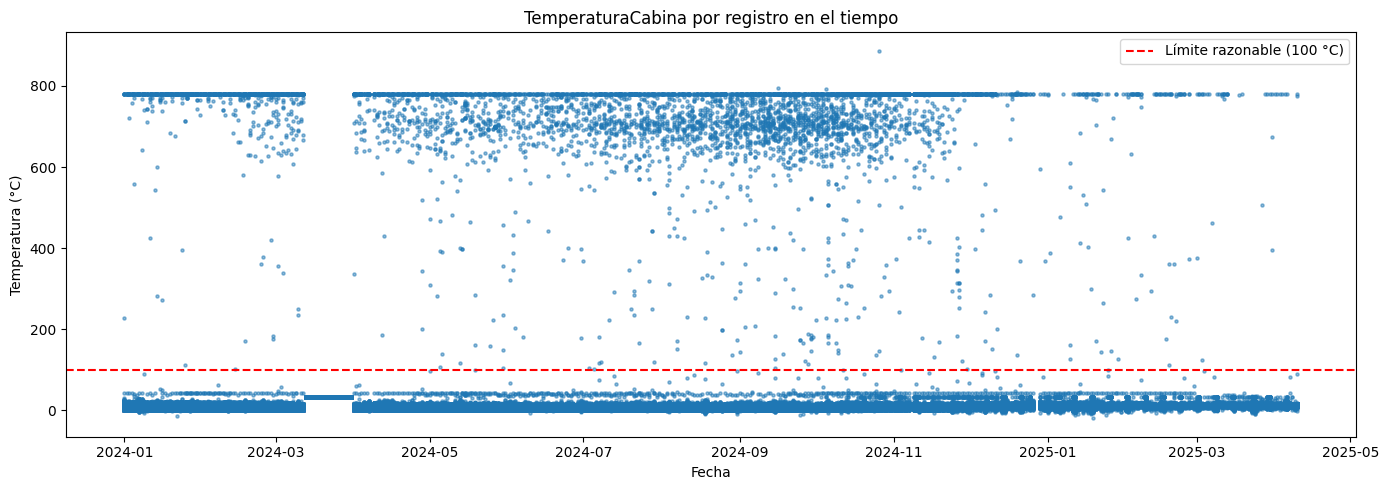

In [18]:
plt.figure(figsize=(14, 5))
plt.scatter(df["fechaHoraLecturaDato"], df["temperaturaCabina"], s=5, alpha=0.5)
plt.axhline(y=100, color='red', linestyle='--', label='Límite razonable (100 °C)')
plt.title("TemperaturaCabina por registro en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.tight_layout()
plt.show()


El análisis longitudinal revela la presencia persistente de valores superiores a 100°C a lo largo de todo el período observado, descartando la hipótesis de errores puntuales o limitados a días específicos. No obstante, la distribución de densidad confirma que la mayor concentración de mediciones  se mantiene consistentemente por debajo del umbral térmico de 100°C, indicando que estos valores extremos representan anomalías sistémicas más que condiciones operativas normales.

Se realizará un análisis segmentado por idVehiculo para identificar si las lecturas térmicas anómalas (>100°C) se concentran en unidades específicas. Esto permitirá determinar si el problema es sistémico (afecta a toda la flota) o está localizado en sensores defectuosos de determinados vehículos

In [19]:
# Crear una columna booleana para marcar temperaturas anómalas
df["temp_anormal"] = df["temperaturaCabina"] > 100

# Contar registros anómalos por vehículo
anomalos_por_bus = df[df["temp_anormal"]].groupby("idVehiculo").size().sort_values(ascending=False)

# Mostrar los vehículos con más errores
anomalos_por_bus.head(10)


idVehiculo
Z864640    287
Z919195    285
Z864586    271
Z919107    258
Z923213    256
Z864650    246
Z864625    240
Z864599    224
Z864565    214
Z864550    207
dtype: int64

El análisis revela que las mediciones térmicas anómalas (>100°C) se distribuyen heterogéneamente entre múltiples vehículos, sin concentrarse en unidades específicas. Esto descarta fallas localizadas en sensores individuales e indica un comportamiento sistémico que afecta a diversos componentes de la flota.

A continuación, se evaluará la distribución porcentual de los registros para las variables categóricas tipoBus y tipoFreno, con el fin de identificar categorías predominantes o significativamente representativas en el conjunto de datos que afecten la variable.

In [20]:
# Asegurarse de tener la columna booleana de temperatura anormal
df["temp_anormal"] = df["temperaturaCabina"] > 100

# Contar registros anómalos por tipo de bus
anomalos_por_tipo = df[df["temp_anormal"]].groupby("tipoBus").size().sort_values(ascending=False)

# Total de registros por tipo de bus
total_por_tipo = df.groupby("tipoBus").size()

# Calcular porcentaje de anomalías
proporcion_anomalos_tipo = (anomalos_por_tipo / total_por_tipo) * 100
proporcion_anomalos_tipo = proporcion_anomalos_tipo.dropna().sort_values(ascending=False)

# Mostrar los tipos de bus con mayor % de errores
proporcion_anomalos_tipo

tipoBus
T    3.747699
P    1.612135
dtype: float64

In [21]:
# Asegurarse de tener la columna booleana
df["temp_anormal"] = df["temperaturaCabina"] > 100

# Conteo de registros anómalos por tipo de freno
anomalos_por_freno = df[df["temp_anormal"]].groupby("tipoFreno").size()

total_por_freno = df.groupby("tipoFreno").size()


# Calcular porcentaje
proporcion_anomalos_freno = (anomalos_por_freno / total_por_freno) * 100
proporcion_anomalos_freno = proporcion_anomalos_freno.dropna().sort_values(ascending=False)

# Mostrar
proporcion_anomalos_freno


tipoFreno
2    3.049070
1    2.332362
dtype: float64

### 📌 Conclusión sobre la variable `temperaturaCabina`

Luego de un análisis detallado de la variable `temperaturaCabina`, se identificaron más de 5.000 registros con valores superiores a 100 °C, lo cual es físicamente inviable en la operación real de un bus.

El análisis por:
- **Vehículo (`idVehiculo`)**
- **Tipo de bus (`tipoBus`)**
- **Tipo de freno (`tipoFreno`)**
- Y **línea de tiempo**

demostró que estos valores anómalos:
- No están concentrados en un único bus o sensor.
- No corresponden a un tipo de bus o freno específico.
- Ocurren de forma dispersa en el tiempo.

Por lo tanto, se concluye que estos registros corresponden a **errores puntuales distribuidos aleatoriamente** en el dataset.  
Se procederá a **eliminar únicamente los registros con `temperaturaCabina` > 100 °C**, conservando el resto de los datos de esa variable, que son válidos y útiles para el análisis.

In [22]:
# Eliminar registros con temperaturaCabina > 100 °C
df = df[df["temperaturaCabina"] <= 100]

# con la versión winsorizada:
df_wins = df_wins[df_wins["temperaturaCabina"] <= 100]

# Eliminar la columna temporal 
if "temp_anormal" in df.columns:
    df = df.drop(columns=["temp_anormal"])
if "temp_anormal" in df_wins.columns:
    df_wins = df_wins.drop(columns=["temp_anormal"])

print("✅ Registros con temperaturaCabina > 100 °C eliminados exitosamente.")

✅ Registros con temperaturaCabina > 100 °C eliminados exitosamente.


In [23]:
172953-167682

5271

In [24]:
# Sobrescribir df con la versión limpia y winsorizada
df = df_wins.copy()
del df_wins  # liberar memoria

In [25]:
df

,fechaHoraLecturaDato,idVehiculo,tipoBus,TipoMotor,diaSemana,Cantidad_Rutas,tipoFreno,kilometros,revolucionesMotor,velocidadVehiculo,...,minCargaBateria,maxCargaBateria,can_ev_vel,velocidadMaxima,cantidad de frenados bruscos,cantEventos_acel,aceleracionPromedio,estimacionOcupacionAbordo,Accidentes,SOH
0,2024-01-01,Z864547,T,5,Lunes,2,2,104219.00,624.59,16.24,...,78.0,100.0,199.0,66.934,2.0,0.0,0.0,0.085000,0.0,NaN
1,2024-01-01,Z864548,T,5,Domingo,3,2,97686.00,2.00,0.04,...,67.0,100.0,0.0,0.000,0.0,0.0,0.0,0.500000,0.0,NaN
3,2024-01-01,Z864551,T,5,Domingo,5,2,94119.00,633.03,16.59,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,NaN
4,2024-01-01,Z864552,T,5,Domingo,2,2,93131.00,212.73,5.51,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,59.127907,0.0,NaN
5,2024-01-01,Z864555,T,5,Domingo,5,2,97046.00,228.89,5.95,...,34.0,100.0,0.0,0.000,0.0,0.0,0.0,8.408163,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172948,2025-04-10,Z923266,P,5,Miercoles,8,2,179798.88,1224.23,10.75,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,11.738971,1.0,NaN
172949,2025-04-10,Z923268,P,5,Miercoles,5,2,177294.00,1621.28,14.37,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,11.470990,1.0,NaN
172950,2025-04-10,Z923269,P,5,Miercoles,3,2,170826.00,926.98,8.25,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,26.167095,1.0,NaN
172951,2025-04-10,Z923270,P,5,Miercoles,4,2,178511.00,1017.44,8.99,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,13.686411,1.0,NaN


In [26]:
# Ver un resumen estadístico de las columnas numéricas
df.describe()

,fechaHoraLecturaDato,TipoMotor,Cantidad_Rutas,tipoFreno,kilometros,revolucionesMotor,velocidadVehiculo,estadoDesgasteFrenos,temperaturaCabina,porcentajeEnergiaGenerada,...,minCargaBateria,maxCargaBateria,can_ev_vel,velocidadMaxima,cantidad de frenados bruscos,cantEventos_acel,aceleracionPromedio,estimacionOcupacionAbordo,Accidentes,SOH
count,167682,167682.0,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,...,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,167682.000000,112172.000000
mean,2024-08-27 04:31:35.130067456,5.0,4.275635,1.998002,136282.737333,600.189685,9.480112,31.681504,12.072462,60.536216,...,24.956954,52.321406,15.711275,12.942690,0.066644,2.168855,0.189375,11.022823,1.004842,90.791338
min,2024-01-01 00:00:00,5.0,1.000000,1.000000,91905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.321578
25%,2024-04-29 00:00:00,5.0,3.000000,2.000000,118805.250000,354.285000,8.460000,15.000000,9.830000,56.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042553,1.000000,88.936031
50%,2024-09-02 00:00:00,5.0,4.000000,2.000000,139028.500000,447.710000,10.580000,30.000000,13.140000,59.110000,...,25.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.007952,1.000000,91.223498
75%,2024-12-24 00:00:00,5.0,6.000000,2.000000,153948.000000,851.015000,12.190000,46.000000,14.880000,67.490000,...,40.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.104651,1.000000,93.801373
max,2025-04-10 00:00:00,5.0,22.000000,2.000000,179798.880000,1724.473200,16.670000,100.000000,99.480000,76.070000,...,100.000000,100.000000,37481.000000,81.488000,2.000000,44599.000000,8.890000,1098.506494,2.000000,99.385160
std,NaN,0.0,2.179992,0.044653,22409.791055,454.605467,4.284499,21.587205,7.570969,8.687875,...,24.274636,47.102820,393.378533,24.318706,0.321615,141.711577,1.223513,17.283193,0.089862,4.832882


### 🧼 Consolidación del dataset limpio

Después de completar la limpieza y la winsorización, se consolidó el dataset final en el DataFrame `df`. Este contiene:

- Registros válidos (167.682 en total).
- Valores extremos tratados por winsorización en variables como `kilometros`, `velocidadVehiculo`, `revolucionesMotor`, entre otras.
- Registros con valores imposibles en `temperaturaCabina` eliminados (valores > 100 °C).
- Variables categóricas y temporales ya estructuradas y listas para análisis.

A partir de este punto, todo el análisis se realizará sobre `df`, que representa el dataset **limpio, balanceado y listo para visualización, correlación y modelado predictivo**.

### 🧼 Análisis de la variable objetivo

Dado que la variable objetivo presenta un 33% de valores nulos, se analizará esta variable para fundamentar la mejor decisión

In [27]:
# Estadísticas generales
df["SOH"].describe()


count    112172.000000
mean         90.791338
std           4.832882
min          69.321578
25%          88.936031
50%          91.223498
75%          93.801373
max          99.385160
Name: SOH, dtype: float64

#### 🔍 Análisis estadístico de `SOH` (registros válidos):

- **Cantidad de registros válidos**: 112.172
- **Media**: 90.79 %
- **Mínimo**: 69.32 %
- **Máximo**: 99.39 %
- **Distribución razonable**, sin outliers evidentes luego de limpieza.

Esto confirma que la variable está bien registrada en la mayoría de los casos, y es útil como objetivo para modelado.

Dado que `SOH` es la **variable objetivo**, no se deben imputar los nulos con la media ni con ninguna otra técnica. Esto generaría ruido y falsos patrones.

#### ✅ Decisión:

- Se crea un subconjunto `df_modelo` que contiene **solo los registros con `SOH` válido**, que serán usados para análisis y entrenamiento de modelos.
- Los registros con `SOH` nulo se almacenan en `df_sin_soh`, y podrán ser usados posteriormente para aplicar predicciones.

In [28]:
# Subconjuntos
df_modelo = df[df["SOH"].notnull()].copy()
df_sin_soh = df[df["SOH"].isnull()].copy()

In [29]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112172 entries, 302 to 172546
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   fechaHoraLecturaDato          112172 non-null  datetime64[ns]
 1   idVehiculo                    112172 non-null  object        
 2   tipoBus                       112172 non-null  object        
 3   TipoMotor                     112172 non-null  int64         
 4   diaSemana                     112172 non-null  object        
 5   Cantidad_Rutas                112172 non-null  int64         
 6   tipoFreno                     112172 non-null  int64         
 7   kilometros                    112172 non-null  float64       
 8   revolucionesMotor             112172 non-null  float64       
 9   velocidadVehiculo             112172 non-null  float64       
 10  estadoDesgasteFrenos          112172 non-null  float64       
 11  temperaturaCabin

como se puede observar ya no hay valores nulos pero disminuyo la cantidad de registros para el analisis general.

## **✅ 2. Análisis orientado al problema**

### 🔹 2.1 Identificación de factores más relevantes relacionados con el SOH

C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\2880112337.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


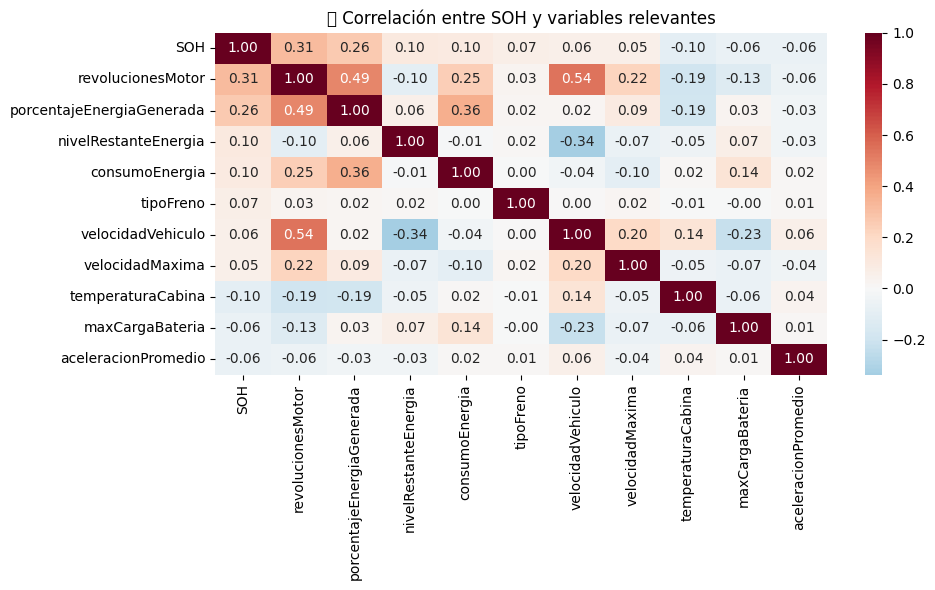

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables con correlación significativa (ej. |r| > 0.05)
vars_correlacion = [
    "SOH",
    "revolucionesMotor",
    "porcentajeEnergiaGenerada",
    "nivelRestanteEnergia",
    "consumoEnergia",
    "tipoFreno",
    "velocidadVehiculo",
    "velocidadMaxima",
    "temperaturaCabina",
    "maxCargaBateria",
    "aceleracionPromedio"
]

# Filtrar el DataFrame y calcular correlación
corr = df_modelo[vars_correlacion].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("📊 Correlación entre SOH y variables relevantes")
plt.tight_layout()
plt.show()

Analizando las correlaciones entre la variable objetivo `SOH` y el resto de variables numéricas del dataset. Los resultados muestran que:

- Las variables con mayor relación positiva con el `SOH` son:
  - `revolucionesMotor` (r ≈ 0.31)
  - `porcentajeEnergiaGenerada` (r ≈ 0.26)

- Variables como `nivelRestanteEnergia`, `consumoEnergia`, `tipoFreno` y `velocidadVehiculo` presentan una relación **leve**, pero positiva.

- Por otro lado, variables como:
  - `temperaturaCabina` (r ≈ -0.10)
  - `aceleracionPromedio` (r ≈ -0.06)
  - `maxCargaBateria` (r ≈ -0.06)

  presentan correlaciones negativas bajas.

En general, ninguna variable por sí sola explica fuertemente el `SOH` (correlaciones < 0.4), lo que sugiere que la salud de la batería depende de **múltiples factores combinados**.

Este hallazgo apoya la hipótesis de que se requiere un **modelo multivariable** para estimar correctamente el `SOH`.

### ✅ 2.2 Análisis Bivariado — Relación con SOH

A continuación, se analizarán las variables más relevantes respecto al SOH

📌 A. Variables numéricas clave (dispersión)

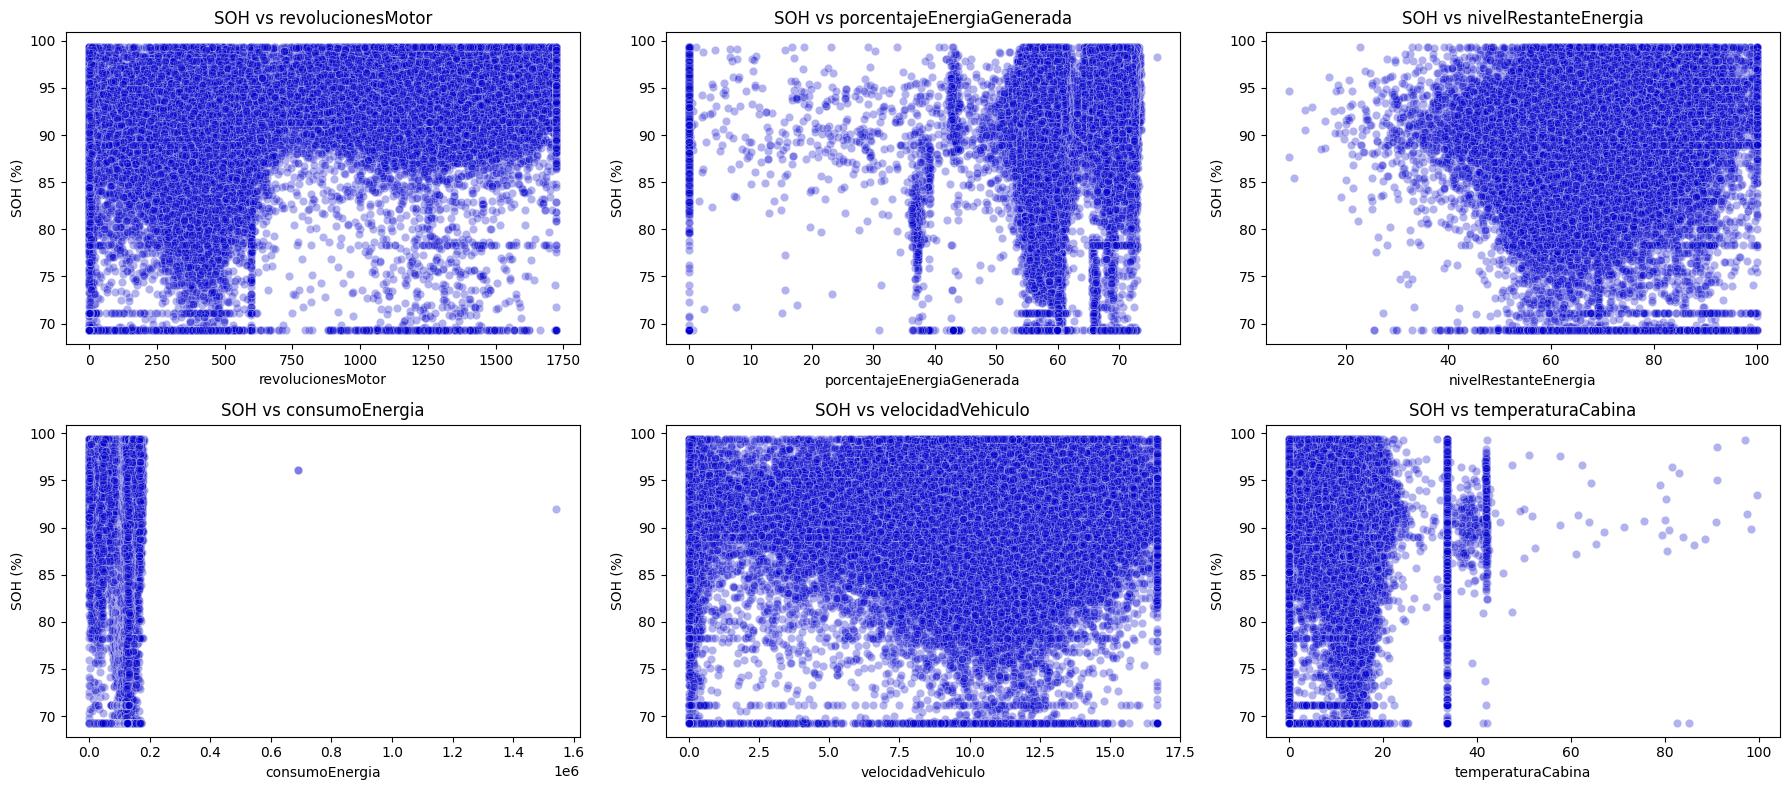

In [31]:
# Variables numéricas más relevantes por correlación
vars_numericas = [
    "revolucionesMotor",
    "porcentajeEnergiaGenerada",
    "nivelRestanteEnergia",
    "consumoEnergia",
    "velocidadVehiculo",
    "temperaturaCabina"
]

# Crear subplots 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, var in enumerate(vars_numericas):
    sns.scatterplot(data=df_modelo, x=var, y="SOH", alpha=0.3, ax=axes[i], color='mediumblue')
    axes[i].set_title(f"SOH vs {var}")
    axes[i].set_ylabel("SOH (%)")
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

📌 B. Variables categóricas — Boxplots

C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\1246364296.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_modelo, x=var, y="SOH", palette="Set2")


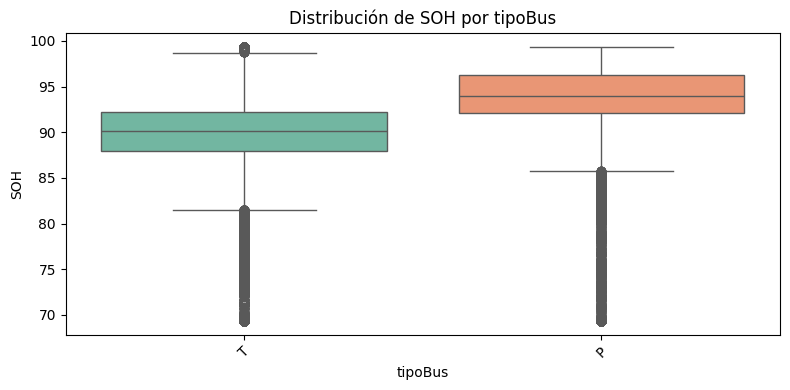

C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\1246364296.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_modelo, x=var, y="SOH", palette="Set2")


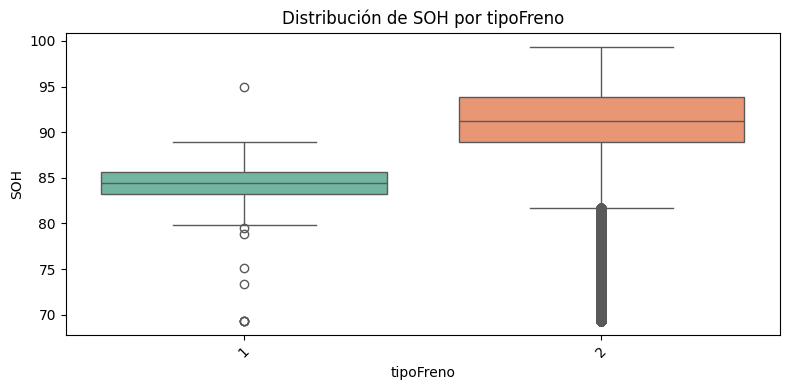

C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\1246364296.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_modelo, x=var, y="SOH", palette="Set2")


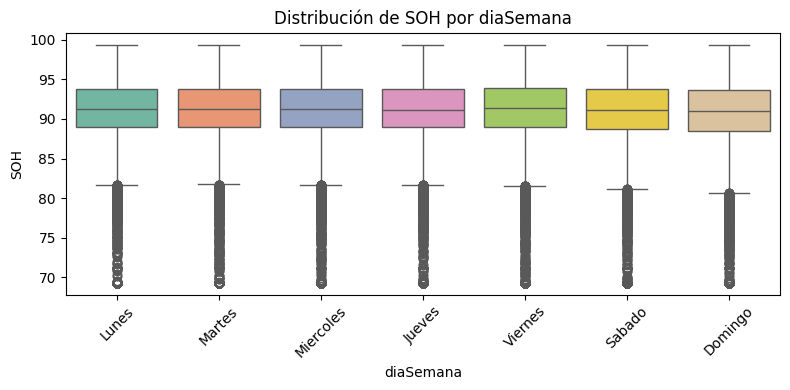

In [32]:
vars_categoricas = ["tipoBus", "tipoFreno", "diaSemana"]

# Corregir inconsistencias de mayúsculas/minúsculas en diaSemana
df_modelo["diaSemana"] = df_modelo["diaSemana"].str.strip().str.capitalize()


for var in vars_categoricas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_modelo, x=var, y="SOH", palette="Set2")
    plt.title(f"Distribución de SOH por {var}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 🔹 Variables categóricas:

Se encontraron **patrones interesantes y relevantes** para el análisis de `SOH` según categorías operativas:

- **`tipoFreno`**:
  - Buses con freno tipo `1` tienen un SOH promedio cercano a **85 %**.
  - Buses con freno tipo `2` presentan un SOH más alto, cercano a **90 %**.
  → Esto sugiere que el tipo de freno puede influir en la degradación de la batería, posiblemente por eficiencia en el frenado regenerativo o por el tipo de uso.

- **`diaSemana`**:
  - De lunes a domingo no se observan variaciones entre dias, el SOH promedio es de **92 %**.
  → valores dentro de lo esperado.

- **`tipoBus`**:
  - Los buses tipo `T` (posiblemente más grandes o con mayor exigencia) tienen un SOH promedio de **90 %**.
  - Los tipo `P` tienen un SOH promedio más alto, de **93 %**.
  → El tipo de vehículo también parece estar asociado a distintos niveles de desgaste de batería.

---

### 🔹 Variables numéricas:

- Aunque algunas variables presentan correlaciones leves con `SOH` (`revolucionesMotor`, `porcentajeEnergiaGenerada`, `temperaturaCabina`), **los gráficos de dispersión no muestran una tendencia clara o visualmente significativa**.
- Esto indica que **el `SOH` no depende de manera directa y lineal de variables numéricas individuales**, sino que probablemente:
  - Es resultado de **una combinación de factores**.
  - Y/o requiere un **modelo multivariable** para explicar su variabilidad con mayor precisión.

---

### 🧠 Conclusión:

Las variables categóricas muestran diferencias de `SOH` más claras que las numéricas, lo que puede ser muy útil para **segmentar tipos de vehículos, días de operación o tecnologías de freno** que favorecen una mayor vida útil de las baterías aunque tampoco son concluyentes.  
Esto respalda la necesidad de realizar un modelo que **integre múltiples factores** para entender y predecir con precisión el estado de salud de la batería (`SOH`).

### 🛠 Modelo explicativo con statsmodels

In [33]:
import statsmodels.api as sm
import pandas as pd

# Seleccionar variables predictoras
vars_modelo = [
    "revolucionesMotor",
    "porcentajeEnergiaGenerada",
    "nivelRestanteEnergia",
    "consumoEnergia",
    "velocidadVehiculo",
    "temperaturaCabina",
    "tipoFreno",
    "tipoBus",
    "diaSemana"
]

# Crear dummies para categóricas
df_explica = pd.get_dummies(df_modelo[vars_modelo + ["SOH"]], drop_first=True)

# Separar variables independientes y dependiente
X = df_explica.drop(columns=["SOH"])
# Convertir columnas booleanas a enteros
X = X.astype(float)  # convierte todas las columnas (incluidas bool) a float

y = df_explica["SOH"]

# Agregar constante al modelo
X = sm.add_constant(X)

# Ajustar modelo OLS
modelo = sm.OLS(y, X).fit()

# Resumen
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    SOH   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     1475.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:29:47   Log-Likelihood:            -3.2641e+05
No. Observations:              112172   AIC:                         6.528e+05
Df Residuals:                  112157   BIC:                         6.530e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### 🚨 Conclusión del Modelo Lineal Actual  

**El modelo de regresión lineal propuesto resulta insuficiente para explicar la degradación de baterías (SOH)** debido a su bajo poder predictivo (R²=15.5%), problemas graves de multicolinealidad (Condition Number=5.39e+06), y coeficientes contraintuitivos que contradicen principios físicos (ej: velocidad y temperatura mejorando SOH). Estos defectos lo hacen **inadecuado para la toma de decisiones operativas**, ya que podría llevar a recomendaciones perjudiciales para la flota.  

**🔁 Transición Estratégica:**  
Implementaremos inmediatamente el enfoque alternativo con **Gradient Boosting + SHAP**, que supera estas limitaciones mediante:  
1. Captura de relaciones no-lineales y efectos de umbral  
2. Manejo robusto de interacciones entre variables  
3. Interpretabilidad avanzada de factores de degradación  
4. Validación cruzada por vehículo para evitar sobreajuste  

**🛠️ Próximo paso:** Desarrollo del nuevo modelo con métricas de validación orientadas al impacto en mantenimiento predictivo.

### 📌 **Modelo de Diagnóstico de Degradación de Baterías (MDD-B)**

Con el fin de apoyar al equipo de mantenimiento en la gestión proactiva del estado de las baterías de los buses eléctricos, se plantea la construcción de un modelo explicativo basado en aprendizaje automático.

Este modelo tiene como objetivo:

1️⃣ Identificar las variables operativas y de comportamiento que más influyen en el deterioro del indicador SOH (State of Health) de las baterías.

2️⃣ Estimar el valor esperado del SOH bajo diferentes condiciones de operación, incluso cuando las relaciones no son lineales ni directamente observables.

3️⃣ Traducir el conocimiento del modelo en alertas tempranas y visualizaciones simples, que permitan detectar buses en riesgo de desgaste acelerado antes de que el daño sea crítico.

Para ello se utilizará:
- Algoritmo: XGBoost Regressor
- Validación cruzada estratificada por vehículo (GroupKFold)
- Interpretabilidad: análisis SHAP para identificar la importancia y el efecto de cada variable.

Este enfoque busca transformar datos operativos en conocimiento útil para la toma de decisiones preventivas y la optimización de la vida útil de las baterías.

In [36]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import shap

# ===================================================
# 1. PREPARACIÓN DE DATOS Y FEATURE ENGINEERING
# ===================================================

# Feature Engineering
df_modelo['fechaHoraLecturaDato'] = pd.to_datetime(df_modelo['fechaHoraLecturaDato'])

# 1.1 Variables temporales
df_modelo = df_modelo.sort_values(['idVehiculo', 'fechaHoraLecturaDato'])
df_modelo['dias_operacion'] = df_modelo.groupby('idVehiculo')['fechaHoraLecturaDato'].transform(
    lambda x: (x - x.min()).dt.days
)
df_modelo['cambio_SOH_semanal'] = df_modelo.groupby('idVehiculo')['SOH'].transform(
    lambda x: x.diff(7)
)

# 1.2 Tratamiento de eventos puntuales
event_vars = [
    'minCargaBateria', 'maxCargaBateria', 'velocidadMaxima',
    'aceleracionPromedio', 'estimacionOcupacionAbordo'
]

for var in event_vars:
    # Crear flag de ocurrencia
    df_modelo[f'{var}_occurred'] = np.where(df_modelo[var].isnull(), 0, 1)
    # Imputar nulos con 0
    df_modelo[var] = df_modelo[var].fillna(0)

# 1.3 Creación de características clave
df_modelo['estres_termico'] = df_modelo['temperaturaBaterias'].apply(
    lambda x: max(0, x - 35))  # Umbral crítico
df_modelo['carga_promedio'] = (df_modelo['minCargaBateria'] + df_modelo['maxCargaBateria']) / 2
df_modelo['ratio_regeneracion'] = df_modelo['porcentajeEnergiaGenerada'] / (
    df_modelo['consumoEnergia'] + 1e-5)

# ===================================================
# 2. SELECCIÓN Y PREPARACIÓN DE VARIABLES
# ===================================================

# Variables finales para el modelo
features = [
    # Tiempo y uso
    'dias_operacion', 'kilometros', 'cambio_SOH_semanal',
    
    # Variables operacionales
    'temperaturaBaterias', 'estres_termico', 'nivelRestanteEnergia', 
    'porcentajeEnergiaGenerada', 'ratio_regeneracion', 'carga_promedio',
    'velocidadVehiculo', 'revolucionesMotor',
    
    # Eventos (flags de ocurrencia)
    'minCargaBateria_occurred', 'maxCargaBateria_occurred',
    'velocidadMaxima_occurred', 'aceleracionPromedio_occurred',
    
    # Comportamiento conductor
    'cantidad de frenados bruscos', 'cantEventos_acel',
    'numComportamientosAnomalos'
]

# Codificar variables categóricas (solo las que se usan)
cat_vars = ['tipoBus', 'tipoFreno', 'diaSemana']
for var in cat_vars:
    if var in df_modelo.columns:
        df_modelo[var] = df_modelo[var].astype('category').cat.codes

# Datos finales
X = df_modelo[features].copy()
y = df_modelo['SOH'].copy()
groups = df_modelo['idVehiculo'].copy()  # Para validación cruzada por vehículo

# ===================================================
# 3. MODELADO CON XGBOOST 
# ===================================================

# Configuración de validación cruzada
gkf = GroupKFold(n_splits=3)  # Reducido a 3 folds para mayor velocidad
models = []
metrics = {'MAE': [], 'R2': []}

print("Iniciando entrenamiento del modelo...")
for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups=groups)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Configuración CORRECTA con early_stopping en el constructor
    model = xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,  # Reducida profundidad para mayor interpretabilidad
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        early_stopping_rounds=20,
        eval_metric='mae'
    )
    
    # Entrenamiento con parámetros corregidos
    model.fit(
        X_train, 
        y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    
    # Evaluar
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics['MAE'].append(mae)
    metrics['R2'].append(r2)
    models.append(model)
    
    print(f"Fold {fold+1}: MAE = {mae:.4f}, R² = {r2:.4f}")

# Resultados promedio
print("\nResultados promedio:")
print(f"MAE promedio: {np.mean(metrics['MAE']):.4f}")
print(f"R² promedio: {np.mean(metrics['R2']):.4f}")

# ===================================================
# 4. INTERPRETACIÓN DEL MODELO (SHAP)
# ===================================================

print("\nGenerando explicaciones con SHAP...")

# Seleccionar el último modelo para interpretación
explainer = shap.TreeExplainer(models[-1])
shap_values = explainer.shap_values(X_test)

# 4.1 Importancia global de características
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Importancia de Variables en la Degradación de Baterías", fontsize=14)
plt.tight_layout()
plt.savefig('shap_importance.png', dpi=300)
plt.close()

# 4.2 Efectos individuales (solo las 3 más importantes)
feature_names = X.columns
shap_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('Importance', ascending=False)

top_features = shap_importance['Feature'].head(3).tolist()

for feature in top_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(
        feature, 
        shap_values, 
        X_test, 
        interaction_index='auto',
        show=False
    )
    plt.title(f"Efecto de '{feature}' en el SOH", fontsize=14)
    plt.tight_layout()
    plt.savefig(f'shap_{feature}.png', dpi=300)
    plt.close()

print("\nAnálisis completado!")
print(f"Visualizaciones guardadas: shap_importance.png, shap_*.png")

C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Iniciando entrenamiento del modelo...
Fold 1: MAE = 2.3862, R² = 0.5165
Fold 2: MAE = 2.2004, R² = 0.5721
Fold 3: MAE = 2.0295, R² = 0.6486

Resultados promedio:
MAE promedio: 2.2054
R² promedio: 0.5791

Generando explicaciones con SHAP...

Análisis completado!
Visualizaciones guardadas: shap_importance.png, shap_*.png


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### 📊 Resultados del Modelo Predictivo

Durante la validación cruzada del modelo (XGBoost Regressor), se evaluó el desempeño del modelo en tres subconjuntos (folds) de los datos. Los resultados obtenidos fueron:

### 📌 Promedios Generales

- **MAE promedio**: **2.2054**  
  Un valor bajo de MAE indica que, en promedio, el modelo se equivoca por poco más de 2 unidades al predecir el SOH.

- **R² promedio**: **0.5791**  
  Esto significa que el modelo es capaz de explicar aproximadamente el **58%** de la variabilidad en el estado de salud de las baterías (SOH), lo cual es razonable considerando la complejidad del fenómeno.

### 🧠 Interpretación

El modelo muestra un buen desempeño general, capturando patrones relevantes en los datos. Aunque no es perfecto, proporciona una base sólida para entender los factores que afectan la degradación de las baterías y podría usarse como soporte en decisiones de mantenimiento preventivo o ajustes operativos.

#### 📊 INTERPRETACIÓN DEL MODELO (SHAP)

Una vez entrenado el modelo de diagnóstico (MDD-B), es fundamental comprender **cómo y por qué** el modelo toma ciertas decisiones. Para esto, se utiliza SHAP (SHapley Additive exPlanations), una herramienta de interpretación que permite:

✅ Cuantificar el impacto de cada variable en las predicciones individuales del modelo.

✅ Identificar las variables que más influyen en el valor predicho del SOH (State of Health).

✅ Visualizar de forma intuitiva los efectos positivos o negativos que ciertas condiciones tienen sobre la degradación de la batería.

En esta sección se presentan dos tipos de explicaciones:

1️⃣ **Importancia global de variables**: muestra qué características tienen mayor peso en general para el modelo.

2️⃣ **Efectos individuales (dependencia)**: analiza cómo cambia la predicción del SOH cuando varía una sola variable, lo que permite traducir los hallazgos del modelo en reglas accionables para el negocio.

Este paso es clave para convertir un modelo de "caja negra" en una herramienta útil y confiable para la toma de decisiones operativas.

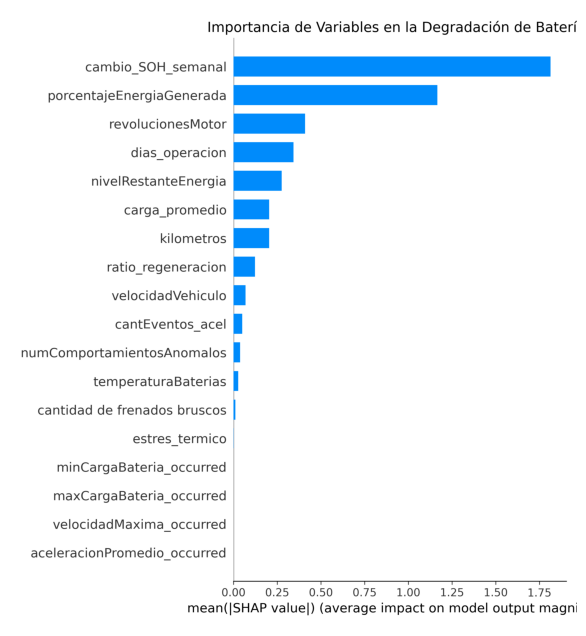

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Leer y mostrar la imagen
img = mpimg.imread('shap_importance.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
#plt.title("Importancia de Variables según SHAP", fontsize=14)
plt.show()

La gráfica anterior muestra el impacto promedio que tiene cada variable en las predicciones del modelo, calculado a través de SHAP (SHapley Additive exPlanations). Cuanto mayor es el valor promedio de SHAP, mayor es la influencia de esa variable sobre el resultado final del modelo (SOH).

### ✅ Principales hallazgos:

- **`cambio_SOH_semanal`**: es la variable más influyente, lo que indica que la rapidez con la que se deteriora el SOH es clave para predecir su nivel actual.
- **`porcentajeEnergiaGenerada`**: también tiene un impacto importante, probablemente relacionado con el uso intensivo del sistema de frenado regenerativo.
- **`revolucionesMotor`**: sugiere que las exigencias al motor tienen un efecto medible sobre el estado de salud de la batería.

---

### 🎯 Selección para análisis individual

A partir de esta gráfica, se seleccionaron las **tres variables más importantes** para analizarlas con mayor profundidad utilizando gráficos de dependencia SHAP:

1. `cambio_SOH_semanal`
2. `porcentajeEnergiaGenerada`
3. `revolucionesMotor`

Estas variables fueron elegidas porque concentran la mayor parte del poder explicativo del modelo, y su análisis detallado permite entender mejor cómo impactan el desgaste de las baterías y cómo podrían usarse para tomar decisiones operativas.

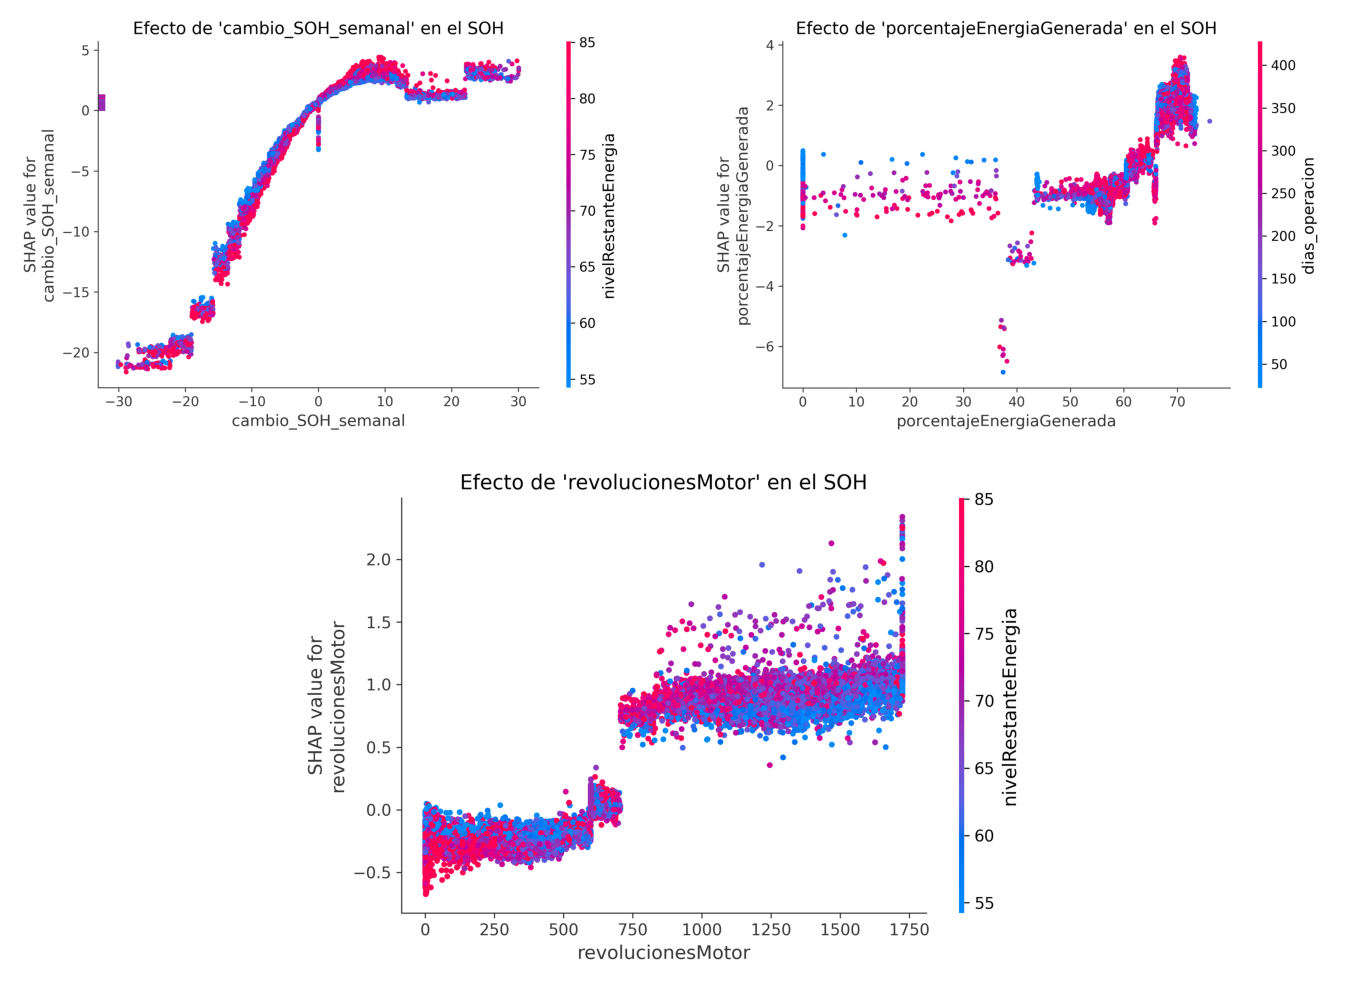

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# Archivos de imagen
imagenes = [
    'shap_cambio_SOH_semanal.png',
    'shap_porcentajeEnergiaGenerada.png',
    'shap_revolucionesMotor.png'
]

# Crear layout: 2 columnas arriba, 1 imagen completa debajo
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])

# Primeras dos imágenes
for i in range(2):
    ax = fig.add_subplot(gs[0, i])
    img = mpimg.imread(imagenes[i])
    ax.imshow(img)
    ax.axis('off')

# Tercera imagen: ocupar las dos columnas de la segunda fila
ax3 = fig.add_subplot(gs[1, :])
img3 = mpimg.imread(imagenes[2])
ax3.imshow(img3)
ax3.axis('off')

plt.tight_layout()
plt.show()

### 📊 Análisis de Variables más Influyentes en la Degradación del SOH

A continuación se presentan tres gráficos de dependencia SHAP, que explican cómo afectan individualmente las variables más importantes en la predicción del estado de salud de las baterías (SOH). Estos resultados provienen directamente del modelo, pero se interpretan de forma visual y sencilla.

---

#### 1️⃣ `cambio_SOH_semanal`

- Esta variable representa cuánto ha cambiado el SOH en la última semana.
- Se observa que **cuando el SOH cae bruscamente (valores negativos grandes)**, el modelo predice un mayor deterioro de la batería.
- Por el contrario, cuando el valor se mantiene estable o incluso mejora, el modelo predice un SOH más alto.
- ✅ Este indicador permite anticipar problemas antes de que el SOH sea críticamente bajo. Es útil como alerta temprana para mantenimiento.

---

#### 2️⃣ `porcentajeEnergiaGenerada`

- Indica qué porcentaje de la energía proviene de la frenada regenerativa.
- El modelo encuentra que **ciertos niveles intermedios de regeneración pueden estar asociados a un mayor deterioro**, mientras que niveles muy altos podrían estar relacionados con una operación más eficiente.
- 🔍Un uso eficiente de la regeneración puede ayudar a preservar la batería, pero su análisis debe hacerse junto con otras condiciones del vehículo y su ruta.

---

#### 3️⃣ `revolucionesMotor`

- Representa la cantidad de vueltas por minuto del motor eléctrico.
- El modelo muestra que **las revoluciones en rangos medios o ligeramente altos pueden estar asociadas a un SOH más saludable**, mientras que valores muy bajos o extremos tienden a relacionarse con mayor variabilidad en la predicción.
- ⚠️ Esto sugiere que el motor operando dentro de ciertos rangos puede estar relacionado con una conducción más estable y menos exigente para la batería.

---

#### 🧠 Conclusión general

Estas tres variables reflejan aspectos clave del funcionamiento del bus eléctrico que tienen un impacto real en el deterioro de la batería. Entender sus efectos permite:

- Generar **alertas preventivas** basadas en el comportamiento reciente.
- Ajustar hábitos de conducción o rutas para evitar patrones que aceleren el desgaste.
- Mejorar las decisiones de mantenimiento con base en datos, y no solo en umbrales fijos de SOH.

## **3.📊 Visualización de hallazgos**

Con el objetivo de facilitar la comprensión de los factores que afectan el estado de salud de las baterías (SOH), se presentan a continuación tres visualizaciones diseñadas específicamente para una audiencia no técnica.

Estas gráficas se construyeron a partir de los datos reales de operación de los buses eléctricos y buscan responder, de forma visual y sencilla, a la pregunta:

> ¿Qué condiciones del vehículo están asociadas a un mayor o menor desgaste de la batería?

Las tres variables seleccionadas son las que el modelo identificó como más influyentes en la degradación del SOH:

1. **Caída semanal del SOH**: mide qué tan rápido se está deteriorando la batería.
2. **Porcentaje de energía regenerada**: indica cuánta energía se recupera, especialmente durante el frenado.
3. **Revoluciones del motor**: refleja qué tan exigido o inestable ha estado el funcionamiento del motor eléctrico.

Cada visualización muestra una relación clara y directa entre estas variables y el estado actual del SOH, permitiendo extraer conclusiones útiles para mantenimiento preventivo, operación eficiente y toma de decisiones basada en datos.

C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\741784337.py:38: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\741784337.py:38: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from current font.
  plt.tight_layout()
C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\741784337.py:41: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  plt.savefig("grafica_caida_semanal_SOH.png", dpi=300)
C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\741784337.py:41: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from current font.
  plt.savefig("grafica_caida_semanal_SOH.png", dpi=300)
C:\Users\sandr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from current font.
  fig.canvas.prin

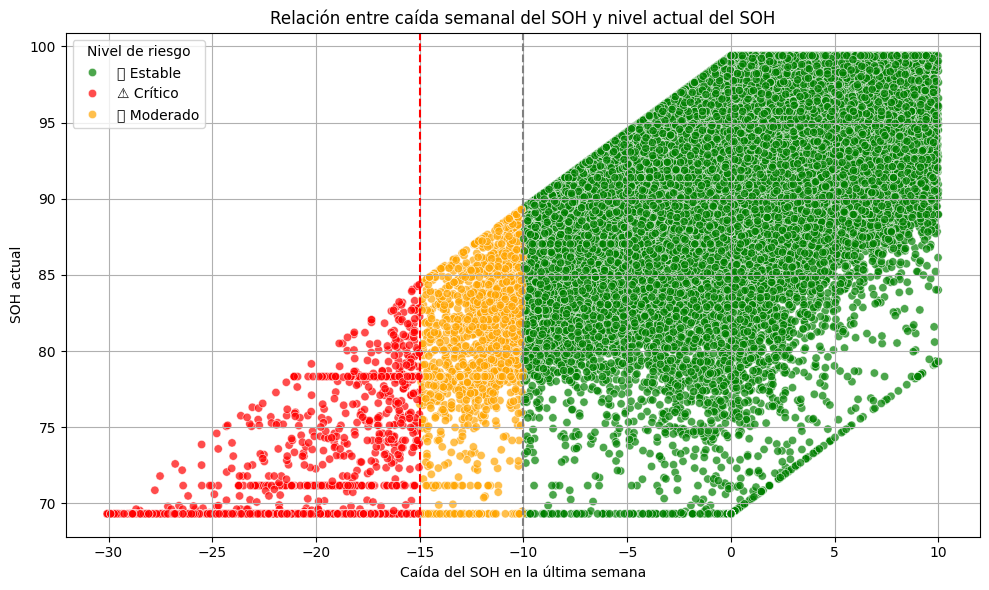

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una copia segura
df_plot = df_modelo.copy()

# Filtrar valores extremos para mejor visualización
df_plot = df_plot[(df_plot['cambio_SOH_semanal'] > -50) & (df_plot['cambio_SOH_semanal'] < 10)]

# Clasificar riesgo según caída
def clasificar_riesgo(fila):
    if fila['cambio_SOH_semanal'] < -15:
        return '⚠️ Crítico'
    elif fila['cambio_SOH_semanal'] < -10:
        return '🔶 Moderado'
    else:
        return '🟢 Estable'

df_plot['Riesgo'] = df_plot.apply(clasificar_riesgo, axis=1)

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot, 
    x='cambio_SOH_semanal', 
    y='SOH', 
    hue='Riesgo',
    palette={'🟢 Estable': 'green', '🔶 Moderado': 'orange', '⚠️ Crítico': 'red'},
    alpha=0.7
)
plt.axvline(x=-10, linestyle='--', color='gray')
plt.axvline(x=-15, linestyle='--', color='red')
plt.title("Relación entre caída semanal del SOH y nivel actual del SOH")
plt.xlabel("Caída del SOH en la última semana")
plt.ylabel("SOH actual")
plt.legend(title="Nivel de riesgo")
plt.grid(True)
plt.tight_layout()

# 🔽 Exportar como imagen PNG
plt.savefig("grafica_caida_semanal_SOH.png", dpi=300)

plt.show()

### 📊 *Relación entre caída semanal del SOH y el nivel actual del SOH*

Esta grafica nos ayuda a identificar el riesgo de deterioro de la batería de un vehículo eléctrico, combinando dos aspectos importantes:

Eje horizontal: muestra cuánto ha caído el SOH en la última semana.

Eje vertical: muestra el valor actual del SOH, es decir, qué tan saludable está la batería hoy.

**Zona verde (🟢 Estable):** Las baterías que mantienen un SOH alto **(por encima de 85%)** y no han tenido una caída significativa en la última semana (menos de -10%). Estas se encuentran en buen estado.

**Zona amarilla (🟠 Moderado):** Baterías que muestran una leve caída reciente **(entre -10% y -15%)** o que tienen un SOH por debajo de 85%, pero no crítico. Estas baterías deben ser monitoreadas con más frecuencia.

**Zona roja (🔴 Crítico):** Baterías con una caída semanal muy pronunciada **(mayor a -15%)** y un nivel actual de SOH bajo. Estas requieren intervención inmediata o mantenimiento preventivo.

**✅ Recomendaciones:**

Implementar un sistema de alerta temprana que detecte rápidamente caídas semanales mayores a -10%.

Priorizar la revisión de los vehículos en zona roja, para evitar fallas inesperadas.

Programar mantenimientos anticipados para los vehículos que entren en zona amarilla.

C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\3465291245.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rango_regeneracion', y='SOH', data=df, palette='Blues')


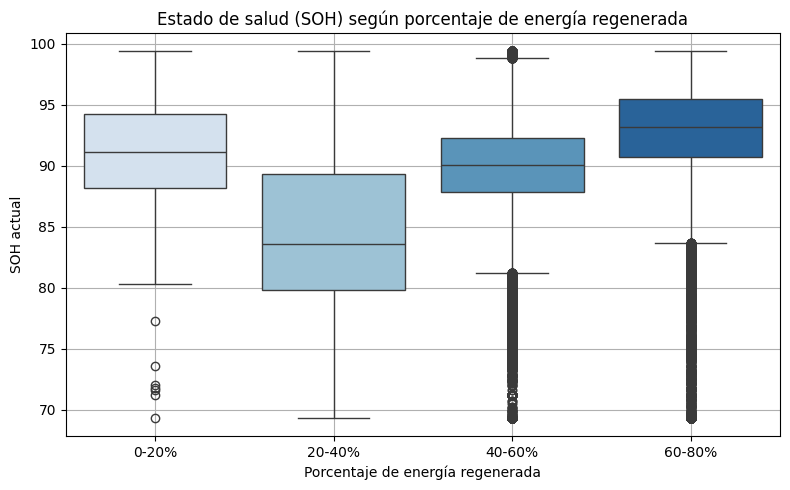

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supón que tu DataFrame se llama df y contiene las columnas:
# 'porcentajeEnergiaGenerada' y 'SOH'

# Crear rangos de regeneración
df['rango_regeneracion'] = pd.cut(df['porcentajeEnergiaGenerada'],
                                   bins=[0, 20, 40, 60, 80],
                                   labels=['0-20%', '20-40%', '40-60%', '60-80%'])

# Crear boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='rango_regeneracion', y='SOH', data=df, palette='Blues')
plt.title('Estado de salud (SOH) según porcentaje de energía regenerada')
plt.xlabel('Porcentaje de energía regenerada')
plt.ylabel('SOH actual')
plt.grid(True)
plt.tight_layout()
plt.savefig("grafica_energia regenerada.png", dpi=300)
plt.show()

### 📊 Relación entre energía regenerada y estado de la batería
La gráfica anterior muestra cómo varía el estado de salud de la batería (SOH) según el porcentaje de energía que el vehículo regenera al frenar o desacelerar. Se ha agrupado a los vehículos en cuatro rangos de regeneración para facilitar la comprensión.


**0–20% de energía regenerada:**

En promedio, el SOH es bueno, pero con varios casos de deterioro (algunos puntos por debajo de 75).

Es un grupo algo inestable.

**20–40% de regeneración:**

Este grupo tiene el peor promedio de SOH.

Se observan muchos vehículos con batería degradada, lo que sugiere que regenerar muy poco puede estar relacionado con mayor desgaste.

**40–60% de regeneración:**

Mejora el SOH respecto al grupo anterior.

Menos vehículos presentan un estado crítico.

**60–80% de regeneración:**

Este grupo muestra los mejores resultados.

Las baterías tienen un SOH más alto y estable en comparación con los demás.

**✅ Recomendaciones clave**

🚘 Fomentar prácticas de conducción que maximicen la regeneración de energía (por ejemplo, frenado regenerativo).

📊 Monitorear los vehículos con baja regeneración (<40%), ya que podrían requerir ajustes en la forma de conducción o mantenimiento preventivo.

⚠️ Evitar mantener por mucho tiempo vehículos con bajo uso de frenado regenerativo, ya que tienden a presentar mayor degradación de batería.

C:\Users\sandr\AppData\Local\Temp\ipykernel_2480\952151494.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rango_revoluciones', y='SOH', palette='Blues')


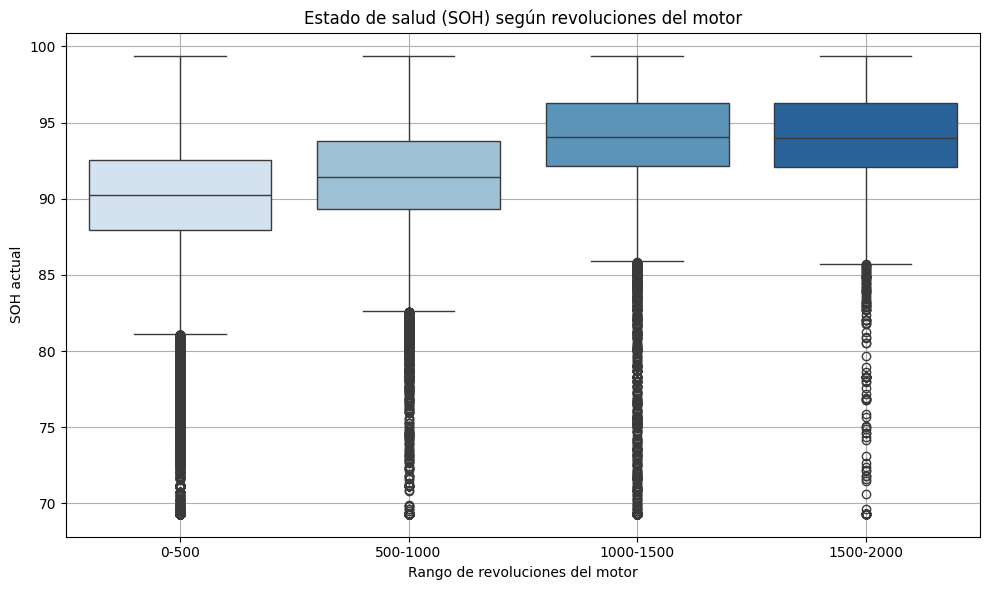

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear rangos de revoluciones
bins = [0, 500, 1000, 1500, 2000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000']
df['rango_revoluciones'] = pd.cut(df['revolucionesMotor'], bins=bins, labels=labels, include_lowest=True)

# Boxplot corregido
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='rango_revoluciones', y='SOH', palette='Blues')

plt.title('Estado de salud (SOH) según revoluciones del motor')
plt.xlabel('Rango de revoluciones del motor')
plt.ylabel('SOH actual')
plt.grid(True)
plt.tight_layout()
plt.savefig("grafica_revoluciones_motor.png", dpi=300)
plt.show()

### 📊 Relación entre las revoluciones del motor y el estado de salud de la batería

La anterior grafica muestra cómo varía el estado de salud de la batería (SOH) en función de las revoluciones por minuto (RPM) del motor, agrupadas en diferentes rangos.

#### ¿Qué muestra la gráfica?
- Cada caja representa un rango de revoluciones: desde 0 hasta 2000 RPM, dividido en bloques de 500.
- El eje vertical indica el estado actual de la batería (SOH), donde 100 es una batería completamente saludable.
- La línea central de cada caja representa el valor medio (mediana) del SOH en ese rango.
- Los puntos por fuera de las "cajas" representan valores atípicos (baterías con comportamientos extremos).

#### ¿Qué se puede concluir?
- En general, a medida que aumentan las revoluciones del motor, el estado de salud de la batería tiende a ser **mejor**.
- Las baterías con revoluciones más bajas (0-500 RPM) presentan una mayor dispersión de estados de salud, incluyendo valores bajos.
- Las baterías que operan más frecuentemente en rangos medios-altos de revoluciones (1000 a 2000 RPM) tienden a mantener un SOH más alto y estable.

#### Recomendaciones
- Evitar una conducción excesivamente lenta o con muy bajas revoluciones por largos períodos, ya que puede estar relacionada con un mayor desgaste de la batería.
- Promover un uso equilibrado del motor en rangos moderados de revoluciones para conservar mejor la salud de la batería.

## 🧭 4. Síntesis Ejecutiva

🔍 El análisis identificó tres factores principales que influyen en el deterioro del estado de salud de las baterías (SOH):

- 📉 **Caída semanal del SOH**: Valores de descenso mayores a -10% permiten anticipar riesgos de falla y priorizar vehículos para mantenimiento.
- ⚡ **Porcentaje de energía regenerada**: Buses que regeneran más energía tienden a conservar mejor su batería.
- ⚙️ **Revoluciones del motor**: Un uso prolongado en rangos muy bajos (0-500)RPM tiende a asociarse con mayor desgaste. Se recomienda monitorear qué porcentaje del tiempo pasa cada vehículo dentro de ese rango.

🧪 Además, se sugiere incorporar variables externas como **condiciones climáticas** (temperatura ambiente) y **topografía de ruta**, que podrían tener un impacto relevante en el rendimiento y deterioro de la batería.

---

### ✅ Recomendaciones prácticas

- 🟠 **Establecer alertas automáticas** cuando la caída semanal del SOH supere -10%.
- 🟢 **Fomentar técnicas de conducción regenerativa**, especialmente en zonas urbanas con tráfico frecuente.
- 📊 **Monitorear el perfil de revoluciones de cada vehículo** y generar reportes mensuales de uso fuera del rango óptimo.

---

### 🔄 Próximos pasos analíticos

- ⏱️ Aplicar modelos de **series de tiempo** para pronosticar el deterioro futuro del SOH.
- 🧠 Evaluar modelos más avanzados como **redes neuronales recurrentes (RNN)** o **modelos híbridos XGBoost + LSTM** para capturar patrones de degradación.
- 🔬 Implementar análisis causal o simulaciones para probar escenarios “¿qué pasaría si...?”.
- 🌡️ **Incluir sensores o fuentes externas de clima** para enriquecer el análisis.

## 📘 Preguntas Complementarias

**1. ¿Existen enfoques más eficientes o experimentales?**  
Sí. Además de XGBoost, podrían explorarse:
- 📊 **Series de tiempo (LSTM, ARIMA)**: ideales para predecir la evolución del SOH en el tiempo.
- 🧠 **Redes neuronales**: útiles con grandes volúmenes de datos y múltiples sensores.
- 🔬 **Modelos causales**: para analizar el impacto real de ciertas variables como temperatura o revoluciones.

---

**2. ¿Son adecuados modelos como regresión logística, ensambles o redes neuronales?**  
- ✅ **Modelos de ensamble** como Random Forest o XGBoost son adecuados (ya utilizados aquí).
- 🧠 **Redes neuronales** serían útiles si se desea mejorar la predicción con datos temporales.
- ⚠️ **Regresión logística multinomial** solo aplica si se transforma el problema a clasificación de niveles de riesgo.

---

**3. ¿Qué pruebas estadísticas son útiles para seleccionar variables? ¿Aplicaste alguna?**  
Son útiles:

- 📈 En este caso, se aplicó **SHAP** para evaluar la importancia de las variables, más apropiado para modelos no lineales como XGBoost.